## Part Three Homography

1. GUI that allows the user to click on the images and show the coordinates

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img1 = cv2.imread("h1.jpg", 0)
img2 = cv2.imread("h2.jpg")
points1 = []
points2 = []
def first_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # the left mouse button is pressed
        # xy = "(%d,%d)" % (x, y)
        text = (x,y)
        points1.append((int(x), int(y)))
        cv2.circle(img1, text, 10, (255, 0, 0), thickness=4)
        # cv2.putText(img1, xy, (x+15, y+15), cv2.FONT_HERSHEY_PLAIN, 5, (255, 0, 0), thickness=5)
        cv2.imshow("image1", img1)

cv2.namedWindow("image1",cv2.WINDOW_KEEPRATIO)
cv2.setMouseCallback("image1", first_on_EVENT_LBUTTONDOWN)
cv2.imshow("image1", img1)


def second_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # the left mouse button is pressed
        # xy = "(%d,%d)" % (x, y)
        text = (x,y)
        points2.append((int(x), int(y)))
        cv2.circle(img2, (x, y), 6, (0, 0, 255), thickness=4)
        # cv2.putText(img2, xy, (x+10, y+10), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), thickness=3)
        cv2.imshow("image2", img2)
        
cv2.namedWindow("image2",cv2.WINDOW_KEEPRATIO)
cv2.setMouseCallback("image2", second_on_EVENT_LBUTTONDOWN)
cv2.imshow("image2", img2)
 
cv2.waitKey(0)
# cv2.destroyAllWindow()

-1

**Outputs:**
- The following images are the results of the programe, the circles represents the clicked positions.

- ![](pick_points.png)

2. Compute the homography matrix from h1.jpg to h2.jpg, and show the homography matrix. Use the homography matrix to tranform h1.jpg to h2.jpg, and show the result.

In [28]:
def Homography(A):
    "do svd to matrix A and get the homography matrix"
    A = A/1.0
    _, _, V = np.linalg.svd(A)
    H1 = V[-1].reshape(3,3)
    H1  = H1/H1[2,2]
    return H1


def Transform(H, i1, i2):
    "transforming img through homography matrix H"
    final = np.zeros(np.shape(i2))
    for i in range(i1.shape[0]):
        for j in range(i1.shape[1]):
            axis = np.array([i,j,1]).reshape(3,1)
            res = H.dot(axis)
            res /= res[-1]
            x = round(res[0,0])
            y = round(res[1,0])
            if x < i2.shape[1] and y < i2.shape[0]:
                final[y][x] = i1[i,j]
    return final

def generate_A(points1, points2):
    x1, y1 = points1[0]
    x2, y2 = points1[1]
    x3, y3 = points1[2]
    x4, y4 = points1[3]
    x1_, y1_ = points2[0]
    x2_, y2_ = points2[1]
    x3_, y3_ = points2[2]
    x4_, y4_ = points2[3]
    
    A = np.matrix([[x1, y1, 1, 0, 0, 0, -x1*x1_, -y1*x1_, -x1_],
                [0, 0, 0, x1, y1, 1, -x1*y1_, -y1*y1_, -y1_],
                
                [x2, y2, 1, 0, 0, 0, -x2*x2_, -y2*x2_, -x2_],
                [0, 0, 0, x2, y2, 1, -x2*y2_, -y2*y2_, -y2_],
                
                [x3, y3, 1, 0, 0, 0, -x3*x3_, -y3*x3_, -x3_],
                [0, 0, 0, x3, y3, 1, -x3*y3_, -y3*y3_, -y3_],
                
                [x4, y4, 1, 0, 0, 0, -x4*x4_, -y4*x4_, -x4_],
                [0, 0, 0, x4, y4, 1, -x4*y4_, -y4*y4_, -y4_]])
    return A

The H matrix from h1.jpg to h2.jpg is:
 [[ 4.13763227e-01  2.47149017e-01  2.75382427e+01]
 [-1.54598667e-01  2.23482026e-01  2.05465551e+02]
 [ 1.03014010e-04 -9.97102054e-05  1.00000000e+00]]


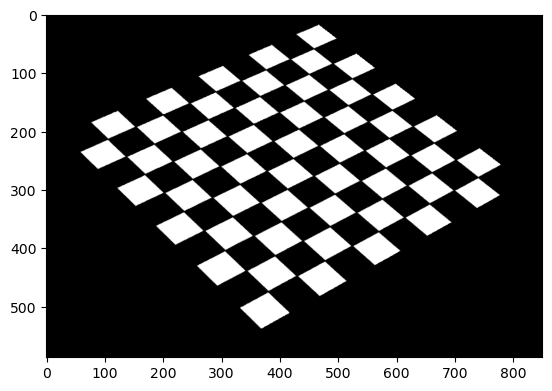

In [18]:
img1 = cv2.imread("h1.jpg",0)
img2 = cv2.imread("h2.jpg",0)

H1 = Homography(generate_A(points1, points2))
print("The H matrix from h1.jpg to h2.jpg is:\n", H1)
final = np.array(Transform(H1, img1, img2))
plt.imshow(final, cmap="gray", vmin=0, vmax=255)
    

3.  Compute the homography matrix from h2.jpg to h1.jpg, and show the matrix.

In [29]:
img1 = cv2.imread("h1.jpg",0)
img2 = cv2.imread("h2.jpg")

H2 = Homography(generate_A(points2, points1))
print("The H matrix from h1.jpg to h2.jpg is:\n", H2)



The H matrix from h1.jpg to h2.jpg is:
 [[ 6.97005607e-01 -5.29611389e-01  4.95937102e+02]
 [ 4.89878414e-01  1.36729319e+00  1.04836604e+02]
 [-6.01885480e-05  4.93644334e-04  1.00000000e+00]]


4. Use the second H to transform h2.jpg to h1.jpg and show the result.

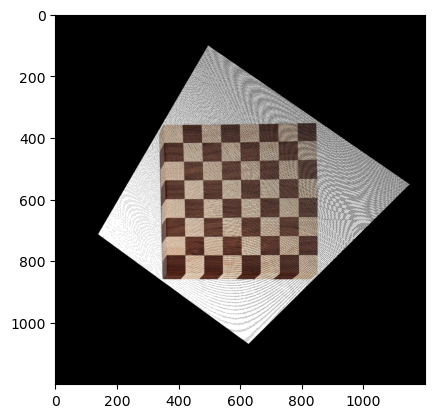

In [23]:
def Trans_color(H, i1, i2):
    "transform the colored picture i1 to plane of i2"
    shape = i2.shape
    result = np.zeros((shape[0],shape[1],3), dtype=i1.dtype)
    row, col = np.shape(i1)[:2]

    for i in range(row):
        for j in range(col):
            t = np.matrix([j,i,1]).reshape(3,1)
            res = H.dot(t)
            res /= res[2,0]
            x = round(res[0,0])
            y = round(res[1,0])
            if y<shape[0] and x<shape[1]:
                result[y,x] = i1[i,j,:]
    
    final = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    return final 

final = Trans_color(H2, i1=img2, i2=img1)
plt.imshow(final, vmin=0, vmax=255)

5. Select points for transforming the simpsons image to the advertisement area of the bus. Compute the homography, transform the image, and show the transformation result.

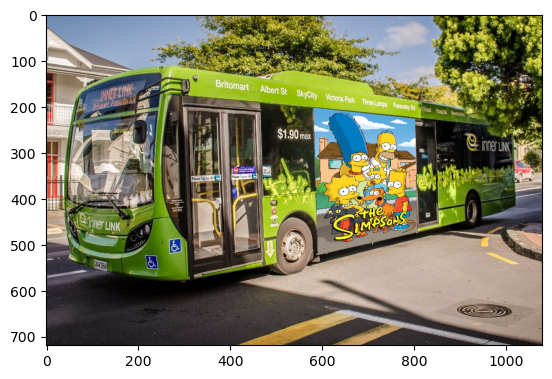

In [30]:
bus = cv2.imread("bus.jpg")
simpsons = cv2.imread("simpsons.jpg")

points1 = []
points2 = []
def bus_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # the left mouse button is pressed
        # xy = "(%d,%d)" % (x, y)
        text = (x,y)
        points1.append((int(x), int(y)))
        cv2.circle(bus, text, 10, (255, 0, 0), thickness=4)
        # cv2.putText(img1, xy, (x+15, y+15), cv2.FONT_HERSHEY_PLAIN, 5, (255, 0, 0), thickness=5)
        cv2.imshow("bus", bus)

def simpsons_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # the left mouse button is pressed
        # xy = "(%d,%d)" % (x, y)
        text = (x,y)
        points2.append((int(x), int(y)))
        cv2.circle(simpsons, (x, y), 6, (0, 0, 255), thickness=4)
        # cv2.putText(img2, xy, (x+10, y+10), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), thickness=3)
        cv2.imshow("simpsons", simpsons)

cv2.namedWindow("bus",cv2.WINDOW_KEEPRATIO)
cv2.setMouseCallback("bus", bus_on_EVENT_LBUTTONDOWN)
cv2.imshow("bus", bus)

cv2.namedWindow("simpsons",cv2.WINDOW_KEEPRATIO)
cv2.setMouseCallback("simpsons", simpsons_on_EVENT_LBUTTONDOWN)
cv2.imshow("simpsons", simpsons)
cv2.waitKey(0)

H3 = Homography(generate_A(points2, points1))
# final = Trans_color(H3, simpsons, bus)

i1 = cv2.imread("simpsons.jpg")
i2 = cv2.imread("bus.jpg")
shape = i2.shape
row, col = np.shape(i1)[:2]

for i in range(row):
    for j in range(col):
        t = np.matrix([j,i,1]).reshape(3,1)
        res = H3.dot(t)
        res /= res[-1,-1]
        x = round(res[0,0])
        y = round(res[1,0])
        i2[y,x] = i1[i,j,:]

final = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
# final = Trans_color(H3, i1, i2)
plt.imshow(final, vmin=0, vmax=255)